In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
import os


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [2]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time

In [3]:
api_key = 'IKGHGW5MQOYG9QOL'


In [4]:
ts = TimeSeries(key=api_key, output_format='pandas')
df, meta_data = ts.get_intraday(symbol='MSFT', interval = '5min', outputsize = 'full')
print(df)

                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2023-03-06 20:00:00  256.9200  256.9300  256.7001  256.9300     1350.0
2023-03-06 19:50:00  256.8200  256.8200  256.8200  256.8200      158.0
2023-03-06 19:45:00  256.8100  256.9200  256.8100  256.9000      785.0
2023-03-06 19:35:00  256.8800  256.9300  256.8800  256.9200     1868.0
2023-03-06 19:30:00  256.8900  256.9100  256.8900  256.9000      632.0
...                       ...       ...       ...       ...        ...
2023-02-06 04:30:00  256.1532  256.1732  256.1532  256.1732      432.0
2023-02-06 04:20:00  256.1233  256.1233  256.0734  256.1233     1175.0
2023-02-06 04:15:00  256.6719  256.6719  256.0934  256.0934     1447.0
2023-02-06 04:10:00  256.5722  256.5722  256.5722  256.5722      738.0
2023-02-06 04:05:00  256.6919  257.6794  256.2131  256.7517     8010.0

[3563 rows x 5 columns]


In [5]:
# For the default date string index behavior
ts = TimeSeries(key=api_key,output_format='pandas', indexing_type='date')
ts
print(ts)

In [6]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='5min', outputsize='full')
pprint(data)


                      1. open   2. high    3. low  4. close  5. volume
date                                                                  
2023-03-06 20:00:00  256.9200  256.9300  256.7001  256.9300     1350.0
2023-03-06 19:50:00  256.8200  256.8200  256.8200  256.8200      158.0
2023-03-06 19:45:00  256.8100  256.9200  256.8100  256.9000      785.0
2023-03-06 19:35:00  256.8800  256.9300  256.8800  256.9200     1868.0
2023-03-06 19:30:00  256.8900  256.9100  256.8900  256.9000      632.0
...                       ...       ...       ...       ...        ...
2023-02-06 04:30:00  256.1532  256.1732  256.1532  256.1732      432.0
2023-02-06 04:20:00  256.1233  256.1233  256.0734  256.1233     1175.0
2023-02-06 04:15:00  256.6719  256.6719  256.0934  256.0934     1447.0
2023-02-06 04:10:00  256.5722  256.5722  256.5722  256.5722      738.0
2023-02-06 04:05:00  256.6919  257.6794  256.2131  256.7517     8010.0

[3563 rows x 5 columns]


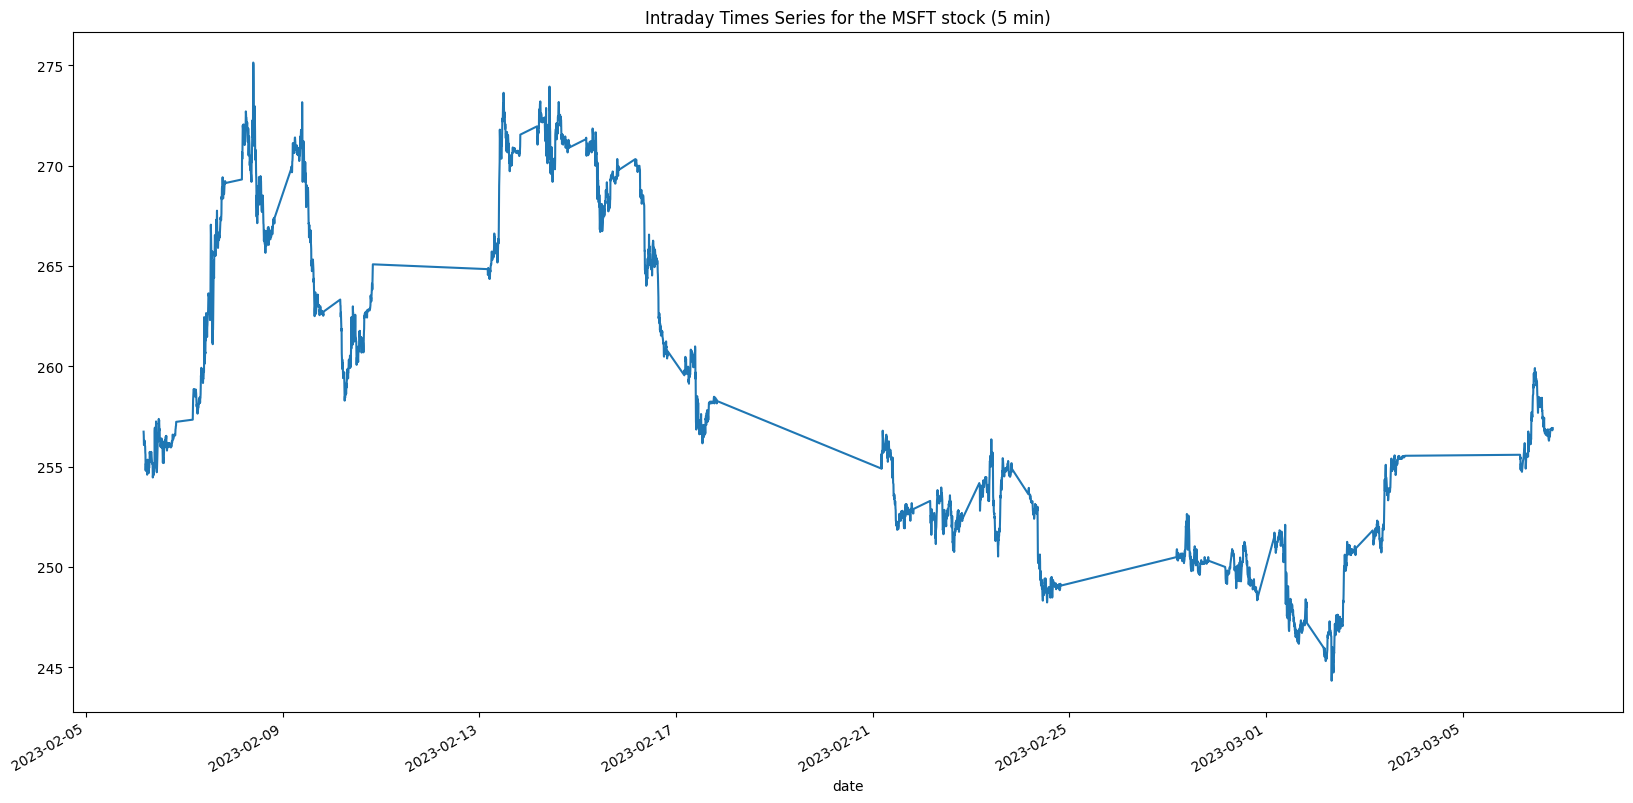

In [7]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key='IKGHGW5MQOYG9QOL', output_format='pandas')
df, meta_data = ts.get_intraday(symbol='MSFT',interval='5min', outputsize='full')
df['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (5 min)')
plt.show()

In [8]:
i = 1
# while i==1:
#    df, meta_data = ts.get_intraday(symbol='MSFT', interval = '1min', outputsize = 'full')
#    df.to_csv("Dataset\Out.csv")
#    time.sleep(60)


In [9]:
df, meta_data = ts.get_intraday(symbol='MSFT', interval = '1min', outputsize = 'full')
df.to_csv("Dataset\Out.csv")

In [10]:
df = pd.read_csv("Dataset\Out.csv")
df.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2023-03-06 20:00:00,256.7001,256.93,256.7001,256.93,978.0
1,2023-03-06 19:59:00,256.9200,256.93,256.9200,256.93,372.0
2,2023-03-06 19:47:00,256.8200,256.82,256.8200,256.82,158.0
3,2023-03-06 19:45:00,256.9000,256.90,256.9000,256.90,310.0
4,2023-03-06 19:43:00,256.8100,256.92,256.8100,256.92,475.0


In [11]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','4. close'])

for i in range(0,len(data)):
    new_dataset["date"][i]=df['date'][i]
    new_dataset["4. close"][i]=df["4. close"][i]

In [12]:
new_dataset.index=new_dataset.date
new_dataset.drop("date",axis=1,inplace=True)

final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

<h2>Build and train the LSTM model</h2>

In [13]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))




lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=10,batch_size=1,verbose=2)

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

Epoch 1/10
927/927 - 21s - loss: 0.0048 - 21s/epoch - 23ms/step
Epoch 2/10
927/927 - 18s - loss: 5.4914e-04 - 18s/epoch - 19ms/step
Epoch 3/10
927/927 - 28s - loss: 4.7363e-04 - 28s/epoch - 30ms/step
Epoch 4/10
927/927 - 31s - loss: 4.4479e-04 - 31s/epoch - 33ms/step
Epoch 5/10
927/927 - 18s - loss: 3.5433e-04 - 18s/epoch - 19ms/step
Epoch 6/10
927/927 - 15s - loss: 2.9911e-04 - 15s/epoch - 16ms/step
Epoch 7/10
927/927 - 23s - loss: 2.8998e-04 - 23s/epoch - 25ms/step
Epoch 8/10
927/927 - 26s - loss: 1.9669e-04 - 26s/epoch - 28ms/step
Epoch 9/10
927/927 - 26s - loss: 2.5896e-04 - 26s/epoch - 28ms/step
Epoch 10/10
927/927 - 26s - loss: 2.0333e-04 - 26s/epoch - 28ms/step


In [14]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)



In [15]:
print(X_test.size)

321540


In [16]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

168/168 [==============================] - 3s 20ms/step


In [17]:
lstm_model.save("saved_lstm_model.h5")


<h2>Visualize the predicted stock costs with actual stock costs</h2>

C:\Users\akila\AppData\Local\Temp\ipykernel_30904\1343216786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


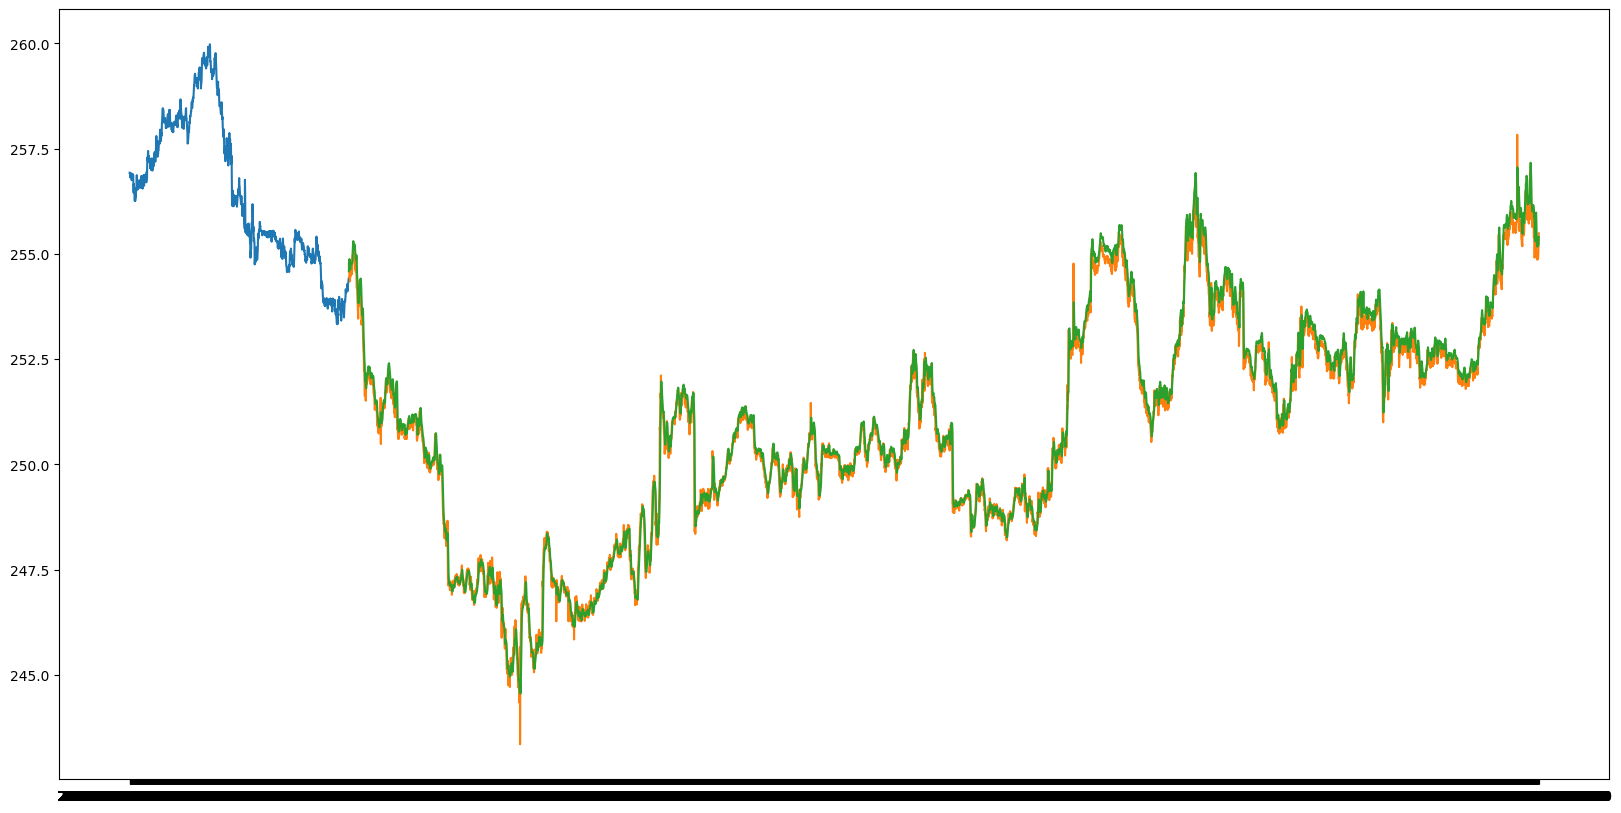

In [18]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["4. close"])
plt.plot(valid_data[['4. close',"Predictions"]])